# Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

# Loading the Data From the Local system.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv("redwine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
587,7.3,0.730,0.24,1.9,0.108,18.0,102.0,0.99670,3.26,0.59,9.3,5
1522,6.1,0.320,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,5
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


# EDA Process

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

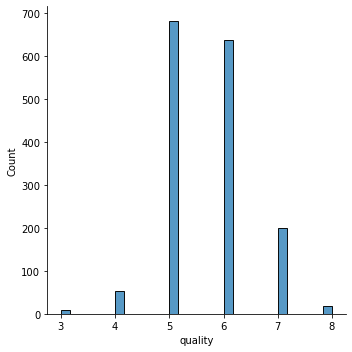

In [10]:
sns.displot(df['quality'])

#Quality Column's data is not properly distributed and so we will convert it into 0 and 1


[3,4,5] = 0 Bad Wine


[6,7,8] = 1 Good Wine


In [11]:
df.quality=df.quality.replace([3,4,5],0)
df.quality=df.quality.replace([6,7,8],1)

df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

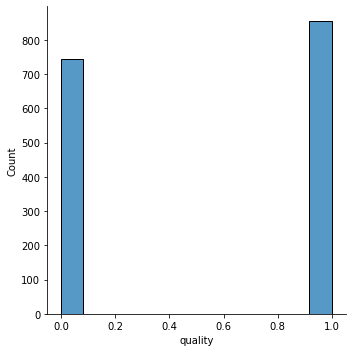

In [12]:
sns.displot(df['quality'])

In [13]:
df.shape

(1599, 12)

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

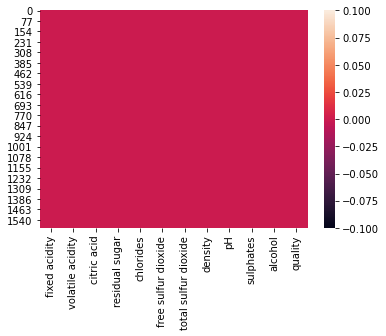

In [15]:
import seaborn as sns
sns.heatmap(df.isnull())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Scatter plot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

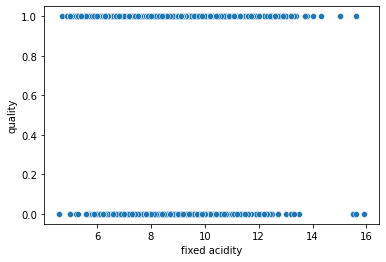

In [17]:
import seaborn as sns
sns.scatterplot(x="fixed acidity",y= "quality",data=df)

as major data is distributed 6 to 14 @fixed acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

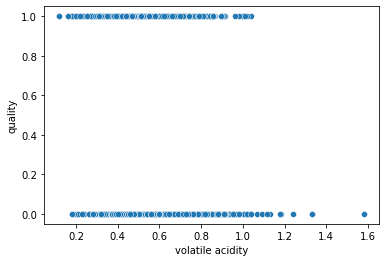

In [18]:
sns.scatterplot(x="volatile acidity",y= "quality",data=df)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

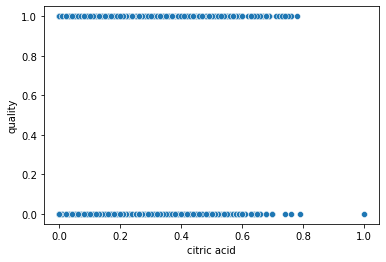

In [19]:
sns.scatterplot(x="citric acid",y= "quality",data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

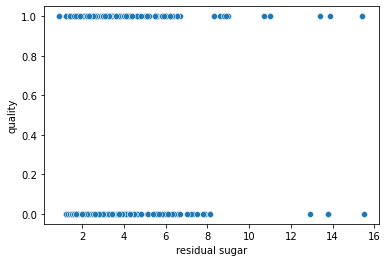

In [20]:
sns.scatterplot(x="residual sugar",y= "quality",data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

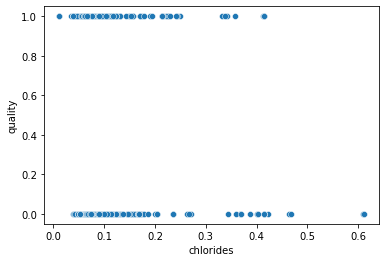

In [21]:
sns.scatterplot(x="chlorides",y= "quality",data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

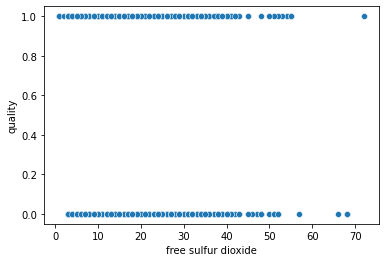

In [22]:
sns.scatterplot(x="free sulfur dioxide",y= "quality",data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

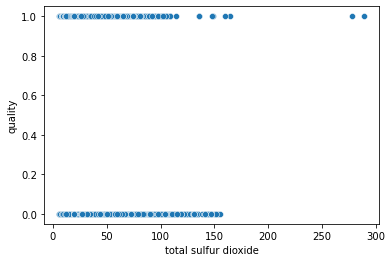

In [23]:
sns.scatterplot(x="total sulfur dioxide",y= "quality",data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

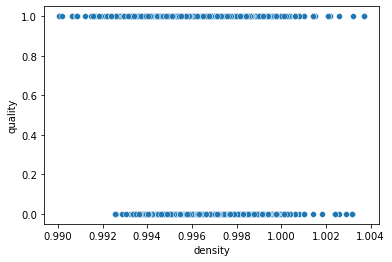

In [24]:
sns.scatterplot(x="density",y= "quality",data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

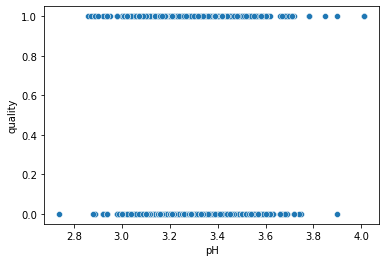

In [25]:
sns.scatterplot(x="pH",y= "quality",data=df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

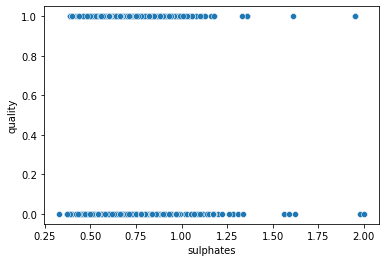

In [26]:
sns.scatterplot(x="sulphates",y= "quality",data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

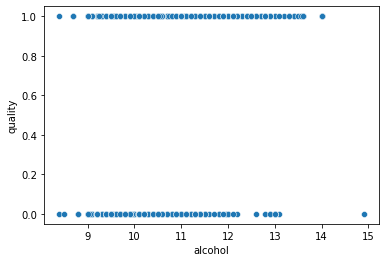

In [27]:
sns.scatterplot(x="alcohol",y= "quality",data=df)

From the above Observations data is not normally distribute

In [28]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Correlation:

In [29]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


<AxesSubplot:>

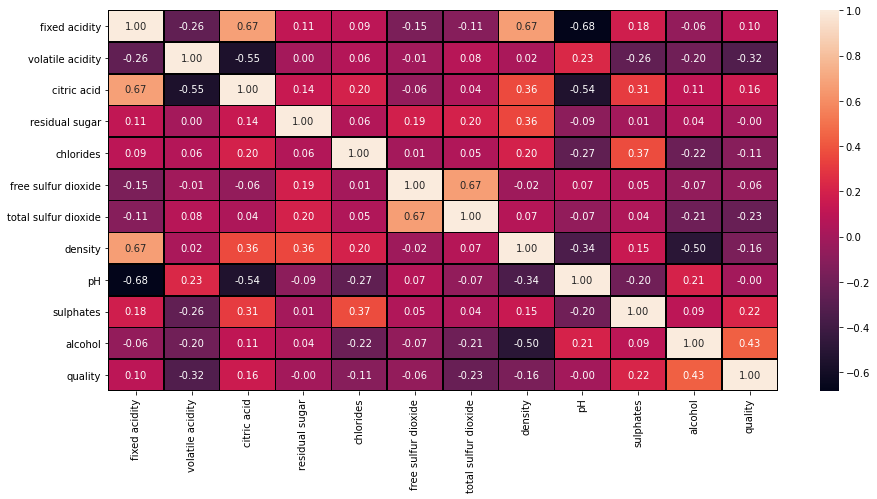

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')


Correlation:
From the above result it is clear that some columns making positive correlation and some making negative correlation.
positive correlation columns are:
    
    1.fixed acidity
    2.citric acid
    3.residual sugar
    4.sulphates
    5.alcohol
    
Negative correlation columns are:

    1.volatile acidity
    2. cholrides
    3.free sulphur di oxide
    4.total sulphur di oxide
    5.density
    6.ph
    

The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Describe Heatmap

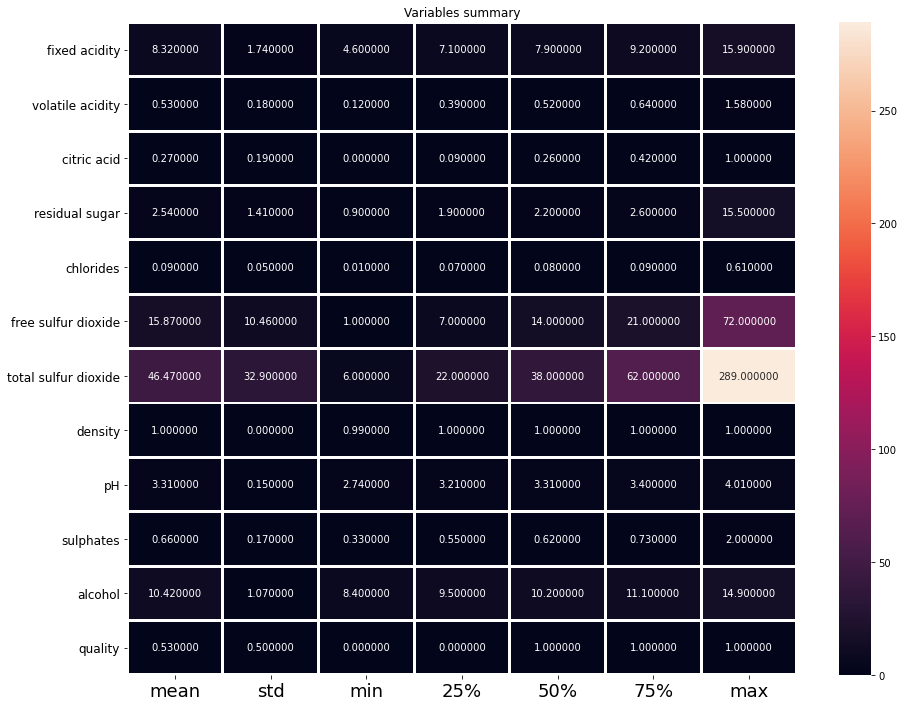

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


# Discription of dataset

In [32]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


key observations:


    1 the mean is more than median (50th percentile) in all columns
    2 there is large difference in 75% percentile and max in residual sugar, 
    free sulphur diaoxide,totalsulfur diaoxide.
    3 from above two observations there is outliers are present in anove three columns.

# Exploiring data Variables

In [33]:
df.quality.unique()

array([0, 1], dtype=int64)

Target/dependent variables is discreate and categorical in nature
quality score scale ranges from 0 to 1;
where 0 is low quality and 1 is best

only scores obtained are between 0 to 1.

In [34]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


AxesSubplot(0.125,0.125;0.62x0.755)


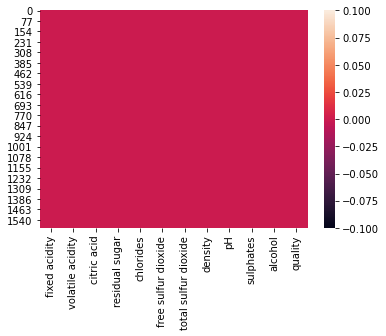

In [35]:
print(sns.heatmap(df.isnull()))


Dataset has no missing values.
if there were any , you would notice in figure represented by different colour shade
do try it out with other dataset which as missing values,you'll see the differemce.
Ex.in titanic dataset you will find " age" and 'cabin' columns with different shades with this code.

# Now use subplot and displot to check data are normalised or not.

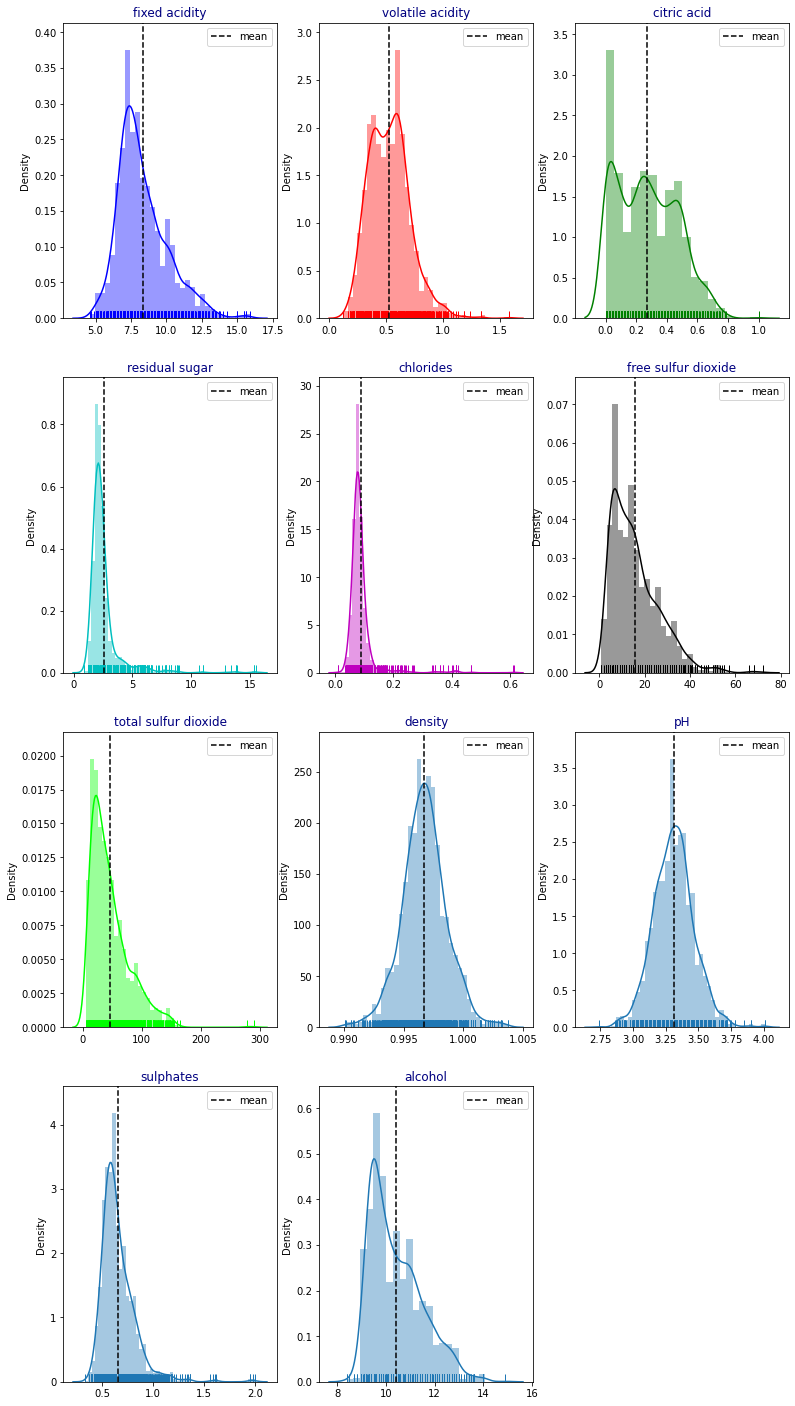

In [36]:
import itertools

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observation:
    As building blocks are out of the normal distribution curve;hence outliers are present and we do data cleaning as well.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

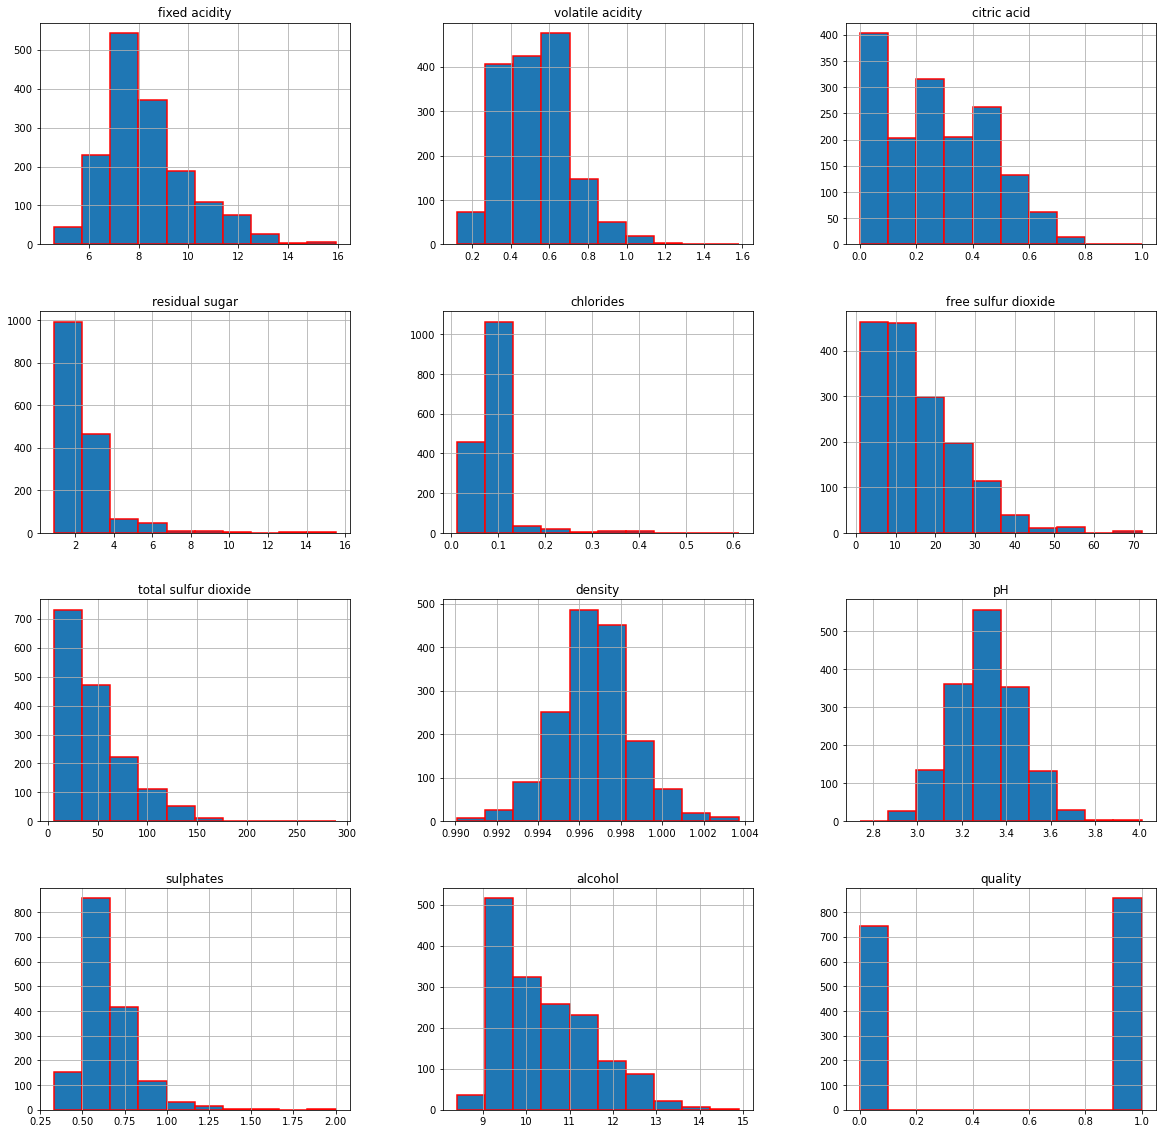

In [37]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

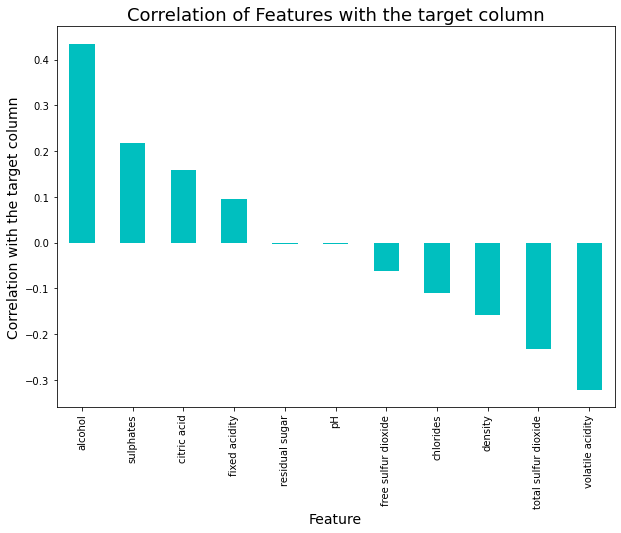

In [38]:
plt.figure(figsize=(10,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [39]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

Skewness:
From the above observation the some columns falls under high skewness:

# Detecting outliers 

<AxesSubplot:>

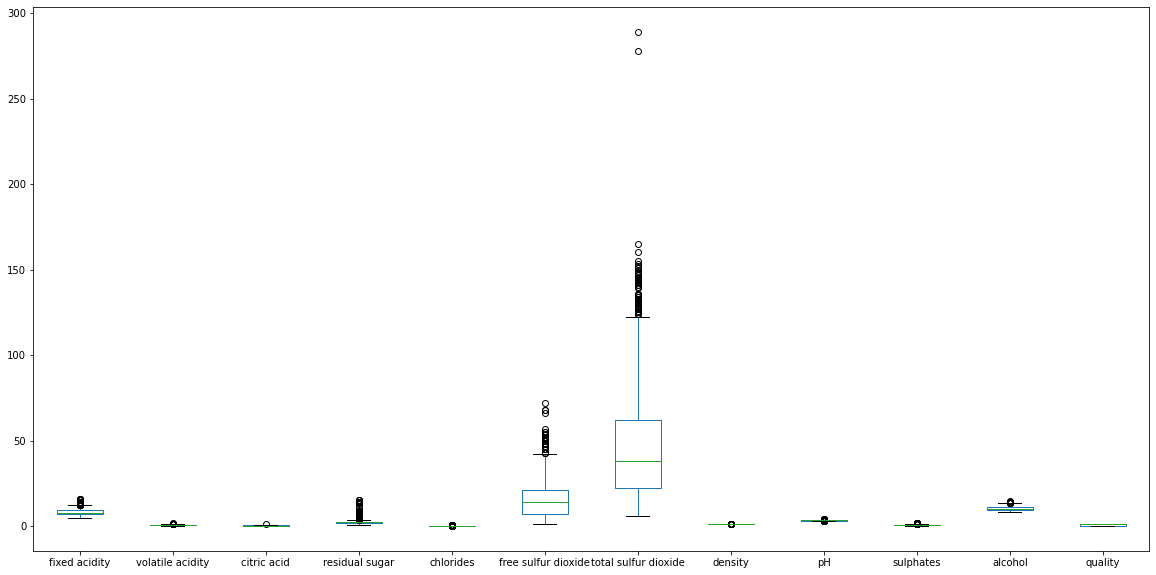

In [40]:
df.plot.box(figsize=(20,10))

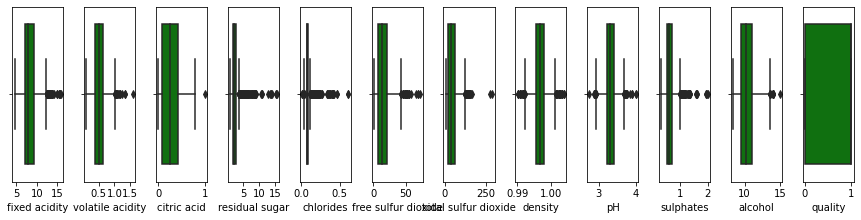

In [41]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in all columns.

# Check the percentage of data falls under outliers:

In [42]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [43]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [44]:
percentage_loss=((1599-1458)/1599)*100
print(percentage_loss)

8.818011257035648


In [45]:
df_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# the data loss is below 10 percentile so we can proceed futher data cleaning.

In [46]:
#because volatile acidity made negativly correlated with the target column.
df_new.drop(['volatile acidity','pH'],axis=1,inplace=True)


In [47]:
df_new.shape

(1458, 10)

In [48]:
x=df_new.iloc[:,0:-1]
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2


In [49]:
x.shape

(1458, 9)

In [50]:
y=df_new.iloc[:,-1]

In [51]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1458, dtype: int64

# Removing skewness by transforming data.

In [52]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46910218, -1.52186998, -0.61004987, ...,  0.63523271,
        -0.58823037, -1.11232895],
       [-0.17212704, -1.52186998,  0.64801055, ...,  0.05629143,
         0.45352708, -0.52685366],
       [-0.17212704, -1.24278981,  0.20720782, ...,  0.17254504,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.66389542,  0.20720782, ..., -0.5637654 ,
         0.9322481 ,  0.7428399 ],
       [-1.88631136, -0.72514559, -0.37438536, ..., -0.72276209,
         0.66861292, -0.03320546],
       [-1.77310975,  1.0702808 ,  1.54128132, ..., -0.71096976,
         0.30109116,  0.7428399 ]])

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46910218, -1.52186998, -0.61004987, ...,  0.63523271,
        -0.58823037, -1.11232895],
       [-0.17212704, -1.52186998,  0.64801055, ...,  0.05629143,
         0.45352708, -0.52685366],
       [-0.17212704, -1.24278981,  0.20720782, ...,  0.17254504,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.66389542,  0.20720782, ..., -0.5637654 ,
         0.9322481 ,  0.7428399 ],
       [-1.88631136, -0.72514559, -0.37438536, ..., -0.72276209,
         0.66861292, -0.03320546],
       [-1.77310975,  1.0702808 ,  1.54128132, ..., -0.71096976,
         0.30109116,  0.7428399 ]])

# Since the column has binary variable we will use logistic classification model

# Regressor Model Building:
Logistic Regression:

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [60]:
np.bincount(y)

array([671, 787], dtype=int64)

In [64]:
y_train.value_counts()

1    622
0    544
Name: quality, dtype: int64

In [65]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 13  The model performs very well
At random_state:- 13
Training accuracy_score is:- 72.89879931389366
Testing accuracy_score is:- 72.94520547945206
At random state 24  The model performs very well
At random_state:- 24
Training accuracy_score is:- 72.5557461406518
Testing accuracy_score is:- 72.6027397260274
At random state 51  The model performs very well
At random_state:- 51
Training accuracy_score is:- 72.64150943396226
Testing accuracy_score is:- 72.6027397260274
At random state 61  The model performs very well
At random_state:- 61
Training accuracy_score is:- 72.64150943396226
Testing accuracy_score is:- 72.6027397260274
At random state 80  The model performs very well
At random_state:- 80
Training accuracy_score is:- 72.5557461406518
Testing accuracy_score is:- 72.6027397260274
At random state 83  The model performs very well
At random_state:- 83
Training accuracy_score is:- 72.89879931389366
Testing accuracy_score is:- 72.94520547945206
At random state 117  The mod

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=691,test_size=0.20)

In [67]:
x_train.shape

(1166, 9)

In [68]:
y_train.shape

(1166,)

In [69]:
x_test.shape

(292, 9)

In [70]:
y_test.shape

(292,)

In [71]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.7773972602739726

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       131
           1       0.81      0.78      0.79       161

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292



In [73]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 69.06721536351166
accuracy_score is :- 77.73972602739725


At cv:- 3
Cross validation score is :- 70.98765432098766
accuracy_score is :- 77.73972602739725


At cv:- 4
Cross validation score is :- 71.74525816649104
accuracy_score is :- 77.73972602739725


At cv:- 5
Cross validation score is :- 71.26065056724569
accuracy_score is :- 77.73972602739725


At cv:- 6
Cross validation score is :- 71.46776406035667
accuracy_score is :- 77.73972602739725


At cv:- 7
Cross validation score is :- 71.88206530311795
accuracy_score is :- 77.73972602739725


At cv:- 8
Cross validation score is :- 72.15666846814388
accuracy_score is :- 77.73972602739725


At cv:- 9
Cross validation score is :- 71.12482853223594
accuracy_score is :- 77.73972602739725




In [74]:
lrscore=cross_val_score(lr,x,y,cv=8)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 71.12482853223594
accuracy_score is :- 77.73972602739725


In [75]:
lrs*100

77.73972602739725

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[102  29]
 [ 36 125]]
0.7773972602739726
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       131
           1       0.81      0.78      0.79       161

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292



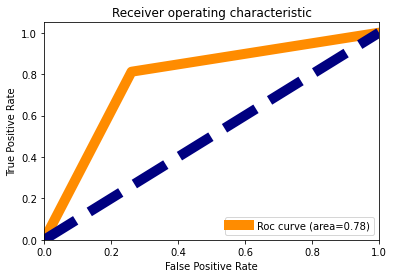

In [77]:
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Conclusion:

In [78]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'Original':a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
287,0,0
288,1,1
289,0,0
290,1,1


In [79]:
df_com.sample(10)

,Original,Predicted
176,0,0
133,1,1
40,0,0
125,1,1
223,1,1
59,0,0
132,1,0
96,0,1
95,1,1
155,1,1


# Our model performs with almost 80% Accuracy